In [1]:
import pandas as pd
import seaborn as sb
import numpy as np

%matplotlib inline

sb.set_palette("Set3")

In [2]:
NOV19 = "nov_19_results.csv"
DEC1 = "1201005601_error_hog.csv"


data = pd.read_csv(DEC1, usecols=range(5))
data["error"] = data["error"].astype(float)
data["model"] = data["model"].str.lower()
print(data[:10])
#no_include = data.diseases != "linearsvmbalanced"
osd_ptosis = data[(data.diseases == "osd_ptosis")]
str_ptosis = data[(data.diseases == "str_ptosis")]
osd_str = data[(data.diseases == "osd_str")]

     diseases              model feature eval_set     error
0  osd_ptosis             rbfsvm     hog      osd  1.000000
1  osd_ptosis             rbfsvm     hog   ptosis  0.000000
2  osd_ptosis             rbfsvm     hog    train  0.272464
3  osd_ptosis     rbfsvmbalanced     hog      osd  0.000000
4  osd_ptosis     rbfsvmbalanced     hog   ptosis  1.000000
5  osd_ptosis     rbfsvmbalanced     hog    train  0.727536
6  osd_ptosis          linearsvm     hog      osd  0.350427
7  osd_ptosis          linearsvm     hog   ptosis  0.079872
8  osd_ptosis          linearsvm     hog    train  0.000000
9  osd_ptosis  linearsvmbalanced     hog      osd  0.350427


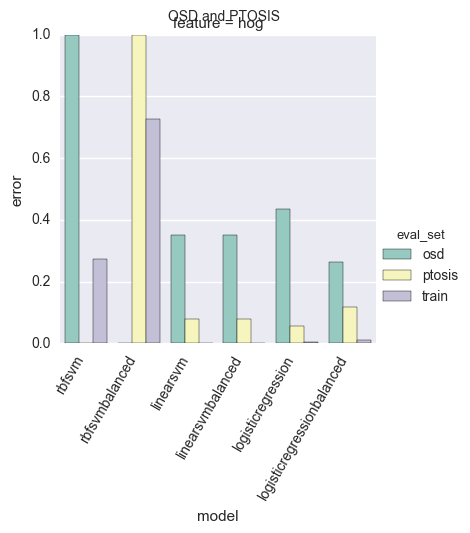

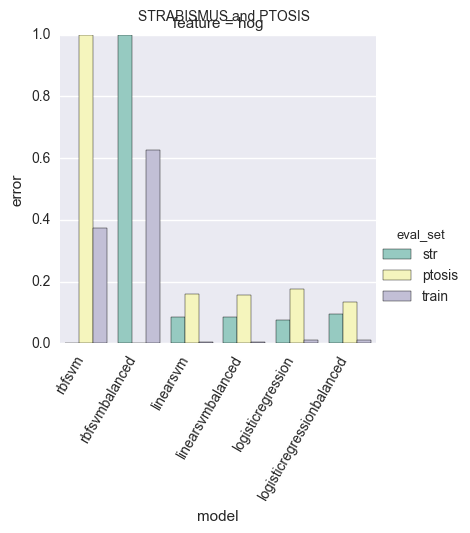

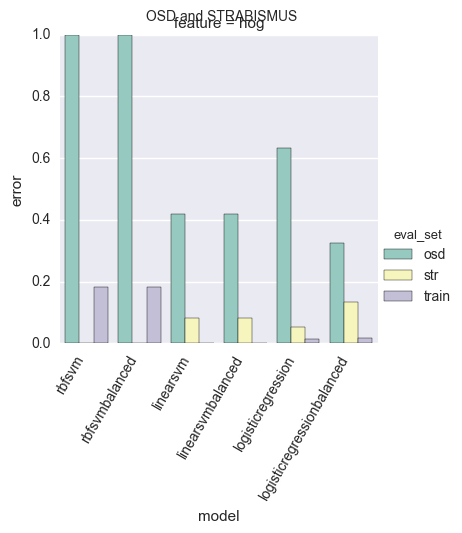

In [9]:
# OSD PTOSIS
op1 = sb.factorplot(x="model", y="error",hue="eval_set",kind="bar", col="feature",  data=osd_ptosis)
op1.set_xticklabels(rotation=60, ha='right')
#plt.subplots_adjust(top=0.8)
op1.fig.suptitle('OSD and PTOSIS')

# STR PTOSIS
op2 = sb.factorplot(x="model", y="error",hue="eval_set",kind="bar", col="feature",  data=str_ptosis)
op2.set_xticklabels(rotation=60,  ha='right')
#plt.subplots_adjust(top=0.8)
op2.fig.suptitle('STRABISMUS and PTOSIS')


# OSD STR
op3 = sb.factorplot(x="model", y="error",hue="eval_set",kind="bar", col="feature",  data=osd_str)
op3.set_xticklabels(rotation=60, ha='right')
#plt.subplots_adjust(top=0.8)
op3.fig.suptitle('OSD and STRABISMUS')


In [11]:
op1.savefig('output/dec1_osd_ptosis.png')
op2.savefig('output/dec1_str_ptosis.png')
op3.savefig('output/dec1_osd_str.png')

/Users/zmaurer/anaconda/envs/python2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


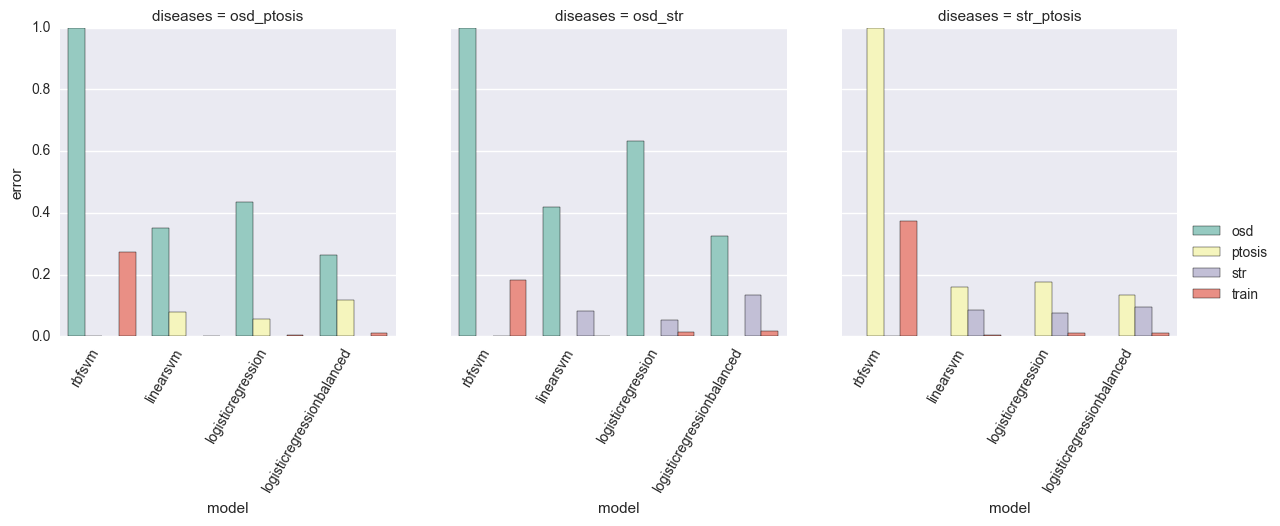

In [6]:
# BEST MODEL
best_models = data[(data.model == "linearsvm") |(data.model == "logisticregressionbalanced") |(data.model == "logisticregression") |(data.model == "rbfsvm")]
best_models = best_models[data.feature == "hog"]
op4 = sb.factorplot(x="model", y="error", hue="eval_set", kind="bar", col="diseases", data=best_models, legend=False,hue_order = ['osd','ptosis','str', 'train'])
op4.set_xticklabels(rotation=60, ha='right')
#plt.subplots_adjust(top=0.8)
op4.add_legend(label_order = ['osd','ptosis','str', 'train'])
#op4.fig.suptitle('Best Performing Models across Diseases using HOG features, with SVM performance for context.')
op4.savefig('output/dec11_best_models_all_diseases.png')